# AI 아키텍트 양성과정 - 파이썬 교육 미니 프로젝트

1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #matplotlib중 pyplot이 그래프를 그리는 모듈
import seaborn as sns
%matplotlib inline 
#그래프 결과를 출력 세션에 나오게 하는 설정
import platform
path = "C:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

2. 데이터 전처리

In [9]:
# 2-0 데이터 불러오기

df = pd.read_excel("1911_교통카드_통계자료_하차2.xls",encoding='euc-kr')
df.shape

(597, 25)

In [10]:
# 2-1 대상 지역을 서울시 중구로 정했으므로 중구에 해당하는 지하철역만 필터링

df2 = df[df['지하철역'].isin(['서울역', '서대문', '시청', '을지로입구', '명동', '을지로4가', '을지로3가', '회현(남대문시장)', '약수', '동대문역사문화공원', '동대입구', '신당', '종각', '버티고개', '충무로'])]
df2.shape

(28, 25)

In [11]:
# 2-2 필터링한 지하철역은 15개인데 행 개수가 28개인 것을 확인
# 데이터를 확인해보니 호선만 다르고 지하철역 이름은 같아서 중복된 행이 있었음
# -> 동일한 지하철 역은 유동인구수를 합쳐서 보기로함

df2['지하철역'].value_counts()

서울역          6
동대문역사문화공원    3
충무로          2
시청           2
신당           2
을지로4가        2
약수           2
을지로3가        2
을지로입구        1
종각           1
서대문          1
명동           1
동대입구         1
버티고개         1
회현(남대문시장)    1
Name: 지하철역, dtype: int64

In [ ]:
# 2-3 지하철역 이름을 그룹화하여 합계를 구하고 데이터를 저장후 다시 불러옴
df3 = df2.groupby(df2['지하철역']).sum()
df3.to_excel('./역별합계_하차.xlsx', encoding='euc-kr')

In [72]:
df3 = pd.read_excel('./역별합계_하차2.xlsx', encoding='euc-kr')

In [73]:
df3.head()

,지하철역,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,동대문역사문화공원,9285,258,0,0,9,3198,25452,65189,189285,...,79055,73447,69221,76273,88870,103398,66689,50019,39996,27993
1,동대입구,1567,127,0,0,3,1307,8139,22347,77911,...,27414,24332,21681,25614,28386,13674,7727,6628,5540,4101
2,명동,3737,165,0,0,1,1360,17000,53503,144486,...,82051,87119,85166,97080,91405,64550,41438,30312,19188,11853
3,버티고개,820,0,0,0,0,271,1573,2868,5870,...,3559,4033,4537,5495,7389,6277,4072,3733,3937,3003
4,서대문,1906,53,0,0,1,1628,21302,52803,164939,...,24738,19707,19381,24847,33221,19934,12297,11961,10645,6313


In [74]:
df3['지하철역'].value_counts()  # 중복값이 없는 것을 확인

을지로입구        1
충무로          1
서울역          1
동대문역사문화공원    1
종각           1
시청           1
신당           1
을지로4가        1
서대문          1
명동           1
동대입구         1
약수           1
버티고개         1
회현(남대문시장)    1
을지로3가        1
Name: 지하철역, dtype: int64

In [75]:
df3.shape # 역 개수가 15개인 것을 확인

(15, 25)

3. 역별, 시간대별 유동인구수 확인

In [42]:
# 3-1 그래프를 그리기 위해 DataFrame을 rotate 후에 저장
df4 = df3.T
df4.to_excel('./회전_최종.xlsx', encoding='euc-kr')

# 저장후 첫번째 행에 기존 인덱스 들어간거 지워주고
# 그래프 그릴때 앞쪽에 작은 수가 가야 이쁘게 나와서 시간 순서만 엑셀로 편집함 (기존 04시 ~ 01시 순서를 00시~ 23시 순으로 바꿈)

In [68]:
# 다시 불러오고 확인
df4 = pd.read_excel('./회전_최종2.xlsx', encoding='euc-kr') #엑셀 수정후 최종2로 이름 바꿈
df4.head()

,시간,동대문역사문화공원,동대입구,명동,버티고개,서대문,서울역,시청,신당,약수,을지로3가,을지로4가,을지로입구,종각,충무로,회현(남대문시장)
0,0,9285,1567,3737,820,1906,15868,3255,7587,5776,2561,1547,4360,1616,4283,2165
1,1,258,127,165,0,53,962,163,114,782,99,72,721,10,140,175
2,2,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,9,3,1,0,1,33,3,1,3,1,0,0,0,2,6


In [69]:
# 3-2 인덱스를 시간컬럼으로 변경 -> 이렇게해야 표만들때 시간 컬럼은 제외됨
df5 = df4.set_index('시간')

In [70]:
df5.head()

,동대문역사문화공원,동대입구,명동,버티고개,서대문,서울역,시청,신당,약수,을지로3가,을지로4가,을지로입구,종각,충무로,회현(남대문시장)
시간,,,,,,,,,,,,,,,
0,9285,1567,3737,820,1906,15868,3255,7587,5776,2561,1547,4360,1616,4283,2165
1,258,127,165,0,53,962,163,114,782,99,72,721,10,140,175
2,0,0,0,0,0,0,1,0,0,1,0,2,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,3,1,0,1,33,3,1,3,1,0,0,0,2,6


([<matplotlib.axis.XTick at 0x1a2cb64cd68>,
 <a list of 24 Text xticklabel objects>)

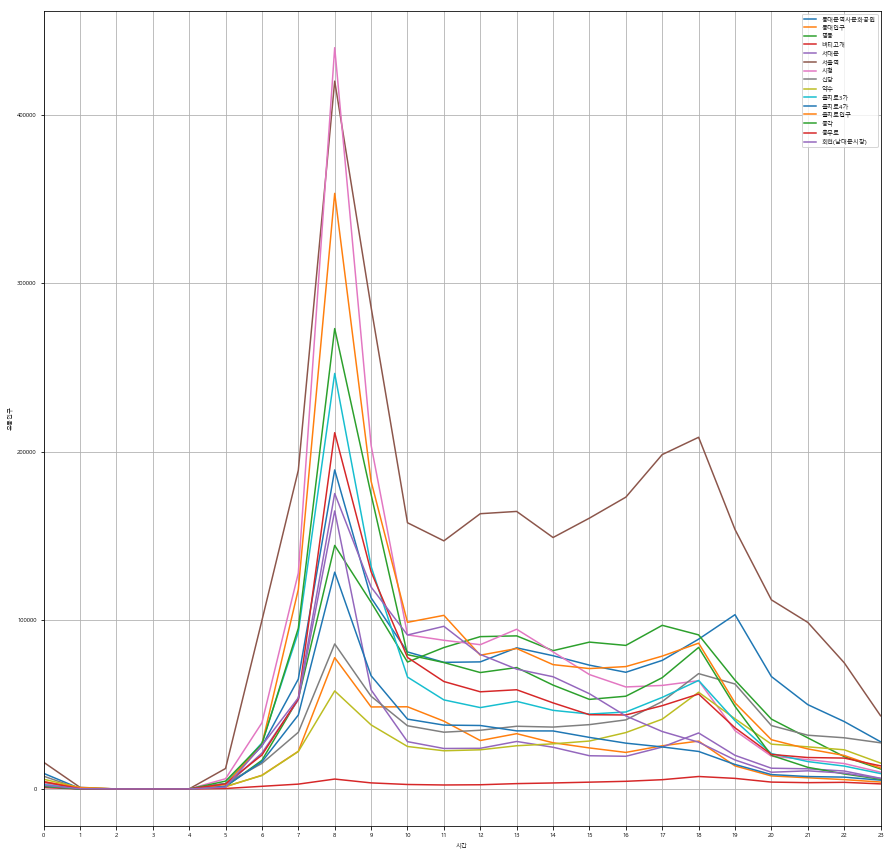

In [71]:
# 3-3 그래프 그려보기 
plt.rc('font', family='Malgun Gothic', size =6)
df5.plot(grid=True, figsize=(15,15)) # 전체 그래프 그리는건 시간이 인덱스인걸로 설정
plt.ylabel('유동인구')
plt.xticks(df4['시간']) #x축 눈금 설정 #시간이 인덱스가 아닌 파일에서 x축으로 설정

([<matplotlib.axis.XTick at 0x1a2cc42fba8>,
 <a list of 24 Text xticklabel objects>)

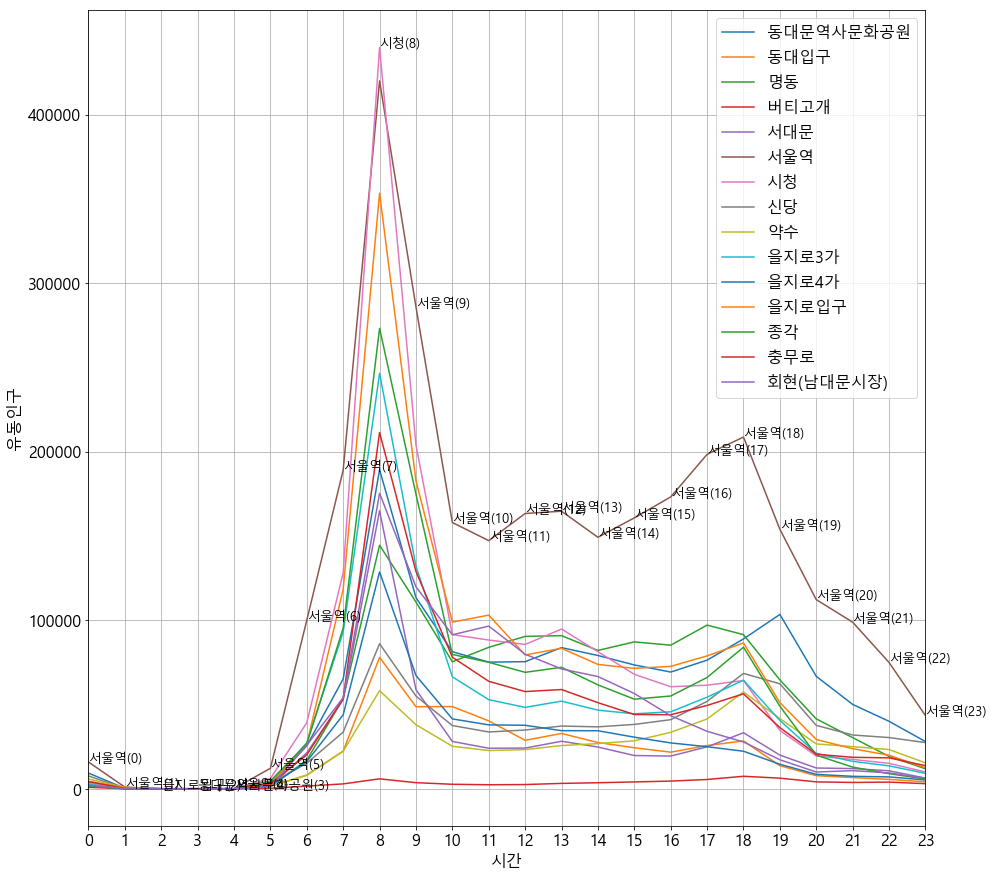

In [80]:
# 3-4 각 시간대별 어떤 역이 1위인지 확인하기 힘들어서 텍스트를 추가함

# x축 좌표 = i   (df3에서 시간대별 컬럼명을 의미)
# y축 = df3[i].max()    (df3에서 시간대별 맥스치 값을 의미)
# T =list(df3['지하철역'][df3[i]==df3[i].max()]) 
# T[0]  지하철역 컬럼에서 i 시간의 값이 맥스값인 행을 출력하고 그걸 리스트로 바꾼뒤 값만 출력
plt.rc('font', family='Malgun Gothic', size =16)
df5.plot(grid=True, figsize=(15,15))
plt.ylabel('유동인구')
for i in range(24):
    T = list(df3['지하철역'][df3[i]==df3[i].max()])
    plt.text(i, df3[i].max(), '{0}({1})'.format(T[0],i), fontsize='13') # (x좌표, y좌표, 출력텍스트, 사이즈)
plt.xticks(df4['시간']) #x축 눈금 설정

In [12]:
# 3-5 승차 인원도 같은 방식으로 진행 

dfs = pd.read_excel('./1911_교통카드_통계자료_승차2.xls', encoding='euc-kr')
dfs.head()

,지하철역,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,서울역,2,0,0,1019,11590,14391,42971,87305,67678,...,118199,123372,173386,256149,138349,97617,97623,71535,34270,3959
1,시청,1,0,0,78,2305,3912,8160,10751,13525,...,57429,70921,91667,170360,74106,60743,61804,40170,14929,917
2,종각,0,0,0,99,4307,4480,7318,12414,15581,...,81845,94418,146602,248103,121851,105922,124509,100457,45860,3847
3,종로3가,6,0,0,187,5307,4617,6657,11028,15803,...,85615,95877,101394,122185,84314,64827,72171,61122,26081,3031
4,종로5가,0,0,0,39,2195,3118,5783,9742,13901,...,72326,77039,95767,124043,67845,45822,39951,31979,10796,827


In [13]:
dfs2 = dfs[dfs['지하철역'].isin(['서울역', '서대문', '시청', '을지로입구', '명동', '을지로4가', '을지로3가', '회현(남대문시장)', '약수', '동대문역사문화공원', '동대입구', '신당', '종각', '버티고개', '충무로'])]
dfs2.shape

(28, 25)

In [14]:
dfs2['지하철역'].value_counts()

서울역          6
동대문역사문화공원    3
신당           2
을지로3가        2
을지로4가        2
충무로          2
시청           2
약수           2
종각           1
동대입구         1
서대문          1
을지로입구        1
명동           1
버티고개         1
회현(남대문시장)    1
Name: 지하철역, dtype: int64

In [11]:
# 데이터중 유동인구 값이 전부 숫자여야되는데 천자리 이상 숫자는 사이에 콤마가 들어가서 문자(object)로 되어있음
dfs2.dtypes

지하철역    object
1        int64
2        int64
3        int64
4       object
5       object
6       object
7       object
8       object
9       object
10      object
11      object
12      object
13      object
14      object
15      object
16      object
17      object
18      object
19      object
20      object
21      object
22      object
23      object
24      object
dtype: object

In [ ]:
# 원본데이터에서 수정후 다시 불러옴

In [16]:
dfs2= dfs2.groupby(dfs2['지하철역']).sum()

In [18]:
dfs2.shape

(15, 24)

In [20]:
# 앞에 인덱스 붙일겸 저장하고 다시 불러옴
dfs2.to_excel('./역별합계_승차.xlsx', encoding='euc-kr')

In [21]:
dfs2 = pd.read_excel('./역별합계_승차.xlsx', encoding='euc-kr')

In [23]:
dfs2.shape

(15, 25)

In [24]:
dfs2.head()

,지하철역,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,동대문역사문화공원,14,2,0,646,22639,13880,19897,33274,35554,...,93474,108542,139857,192329,113640,85256,81450,75276,47445,8502
1,동대입구,1,0,0,16,1775,2762,5862,9923,8715,...,28784,34610,53153,57290,32165,39052,30018,20848,7330,895
2,명동,2,0,0,47,1664,3954,6986,15425,29189,...,81519,93765,111332,159787,106689,96943,103048,95856,40144,2662
3,버티고개,0,0,0,4,980,2143,5641,9425,6944,...,3876,3941,5416,6946,3835,2717,2161,1793,859,143
4,서대문,1,0,0,12,2996,6448,18532,25821,18226,...,34117,46523,64818,124305,38223,27987,26983,19081,7678,886


In [36]:
# 가중치 표현
dfs3 = (dfs2.values)*2

In [38]:
dfs3 = pd.DataFrame(dfs3)

In [39]:
dfs3.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,동대문역사문화공원동대문역사문화공원,28,4,0,1292,45278,27760,39794,66548,71108,...,186948,217084,279714,384658,227280,170512,162900,150552,94890,17004
1,동대입구동대입구,2,0,0,32,3550,5524,11724,19846,17430,...,57568,69220,106306,114580,64330,78104,60036,41696,14660,1790
2,명동명동,4,0,0,94,3328,7908,13972,30850,58378,...,163038,187530,222664,319574,213378,193886,206096,191712,80288,5324
3,버티고개버티고개,0,0,0,8,1960,4286,11282,18850,13888,...,7752,7882,10832,13892,7670,5434,4322,3586,1718,286
4,서대문서대문,2,0,0,24,5992,12896,37064,51642,36452,...,68234,93046,129636,248610,76446,55974,53966,38162,15356,1772


In [41]:
dfs4 = (dfs2.values)+(dfs2.values)
dfs4 = pd.DataFrame(dfs4)
dfs4.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,동대문역사문화공원동대문역사문화공원,28,4,0,1292,45278,27760,39794,66548,71108,...,186948,217084,279714,384658,227280,170512,162900,150552,94890,17004
1,동대입구동대입구,2,0,0,32,3550,5524,11724,19846,17430,...,57568,69220,106306,114580,64330,78104,60036,41696,14660,1790
2,명동명동,4,0,0,94,3328,7908,13972,30850,58378,...,163038,187530,222664,319574,213378,193886,206096,191712,80288,5324
3,버티고개버티고개,0,0,0,8,1960,4286,11282,18850,13888,...,7752,7882,10832,13892,7670,5434,4322,3586,1718,286
4,서대문서대문,2,0,0,24,5992,12896,37064,51642,36452,...,68234,93046,129636,248610,76446,55974,53966,38162,15356,1772
